**Preprocessing**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# load dataset
data_path = 'video_game_reviews.csv'
data = pd.read_csv(data_path)

# cek tipe data
print(data.dtypes)

# data preprocessing
# pengecekan Missing Values
print("Pengecekan Missing Values:")
print(data.isnull().sum())
print("Pengecekan Duplikasi:")
print(data.duplicated().sum())



Game Title                  object
User Rating                float64
Age Group Targeted          object
Price                      float64
Platform                    object
Requires Special Device     object
Developer                   object
Publisher                   object
Release Year                 int64
Genre                       object
Multiplayer                 object
Game Length (Hours)        float64
Graphics Quality            object
Soundtrack Quality          object
Story Quality               object
User Review Text            object
Game Mode                   object
Min Number of Players        int64
dtype: object
Pengecekan Missing Values:
Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Lengt

**EDA**


Korelasi dengan Target (User Rating):
Korelasi antara User Rating dan User Rating: 1.00
Korelasi antara Price dan User Rating: 0.76
Korelasi antara Release Year dan User Rating: -0.00
Korelasi antara Game Length (Hours) dan User Rating: 0.63
Korelasi antara Min Number of Players dan User Rating: -0.00


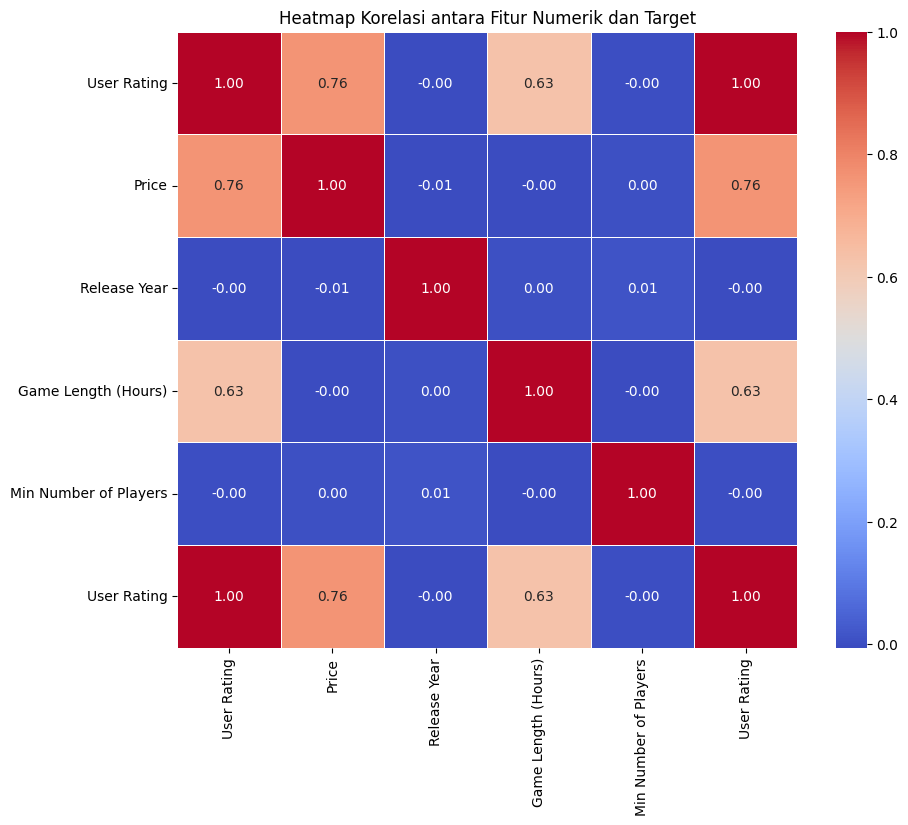

In [11]:
# korelasi dan Heatmap
# pisahkan fitur numerik dan kategorikal
numerical_features = data.select_dtypes(include=[float, int]).columns.tolist()

# Definisikan target
target = 'User Rating'

# korelasi antara fitur numerik dan target
correlation_with_target = data[numerical_features].corr()[target]

# print korelasi dengan target dalam bentuk teks
print("\nKorelasi dengan Target (User Rating):")
for feature, correlation in correlation_with_target.items():
    print(f"Korelasi antara {feature} dan {target}: {correlation:.2f}")

# menentukan fitur dengan korelasi lebih besar dari threshold
threshold = 0.1
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index

# visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Fitur Numerik dan Target')
plt.show()

**Seleksi Fitur**


Top Features yang Terpilih berdasarkan Feature Selection:
['Price', 'Game Length (Hours)']

Feature Importance:
Fitur: Price, Importance: 0.59
Fitur: Game Length (Hours), Importance: 0.41


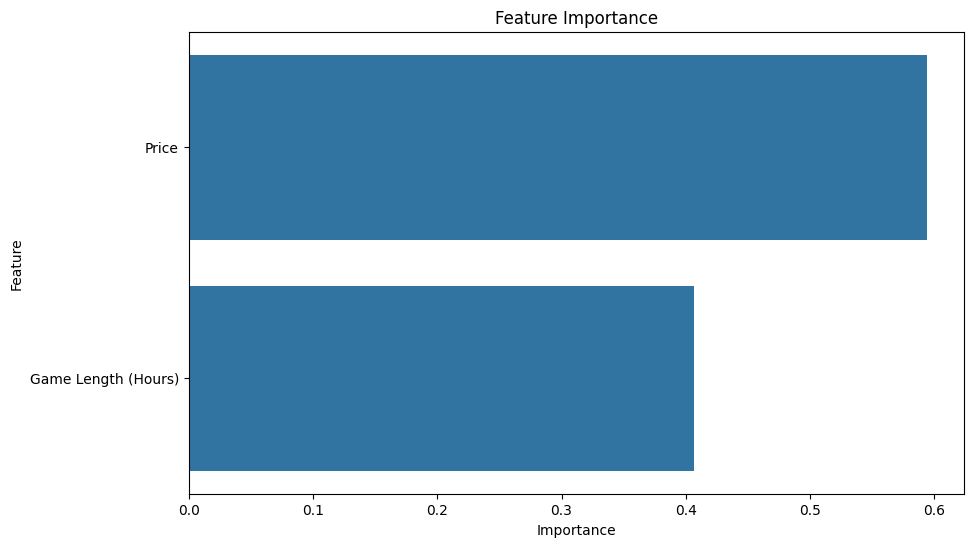


Distribusi Fitur Numerik:

Distribusi Price:
Min: 19.99, Max: 59.99
Mean: 39.95, Median: 39.84
Standard Deviation: 11.52

Distribusi Game Length (Hours):
Min: 5.0, Max: 60.0
Mean: 32.48, Median: 32.50
Standard Deviation: 15.87


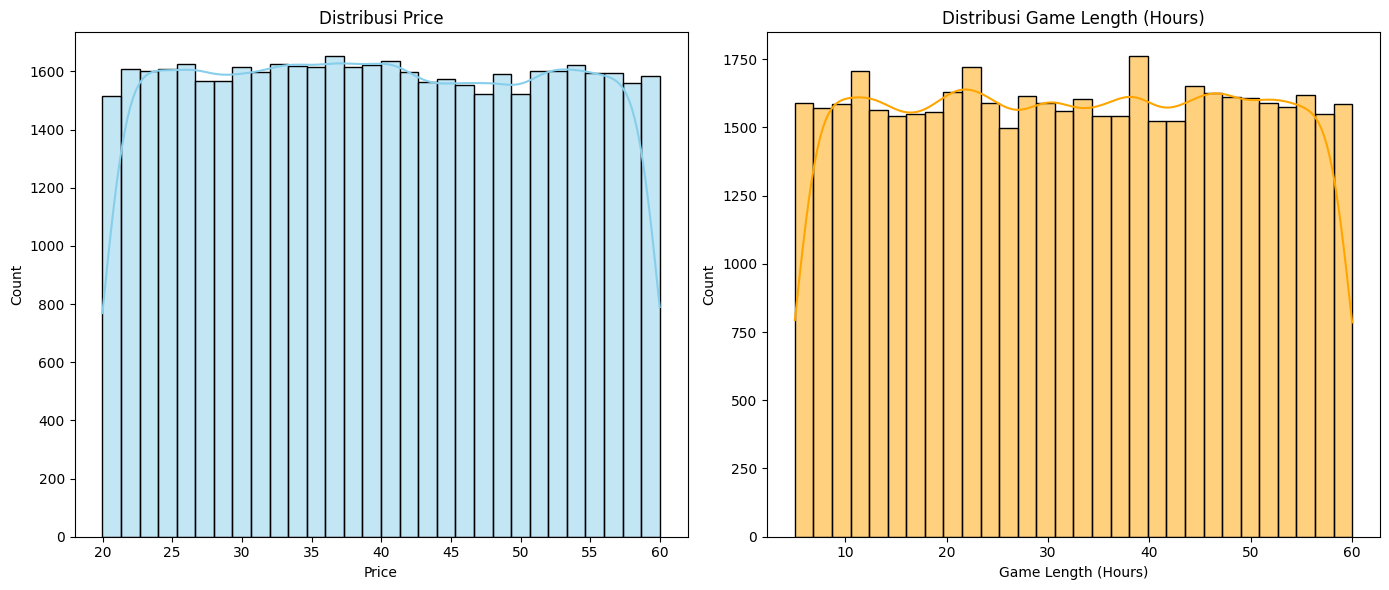

In [12]:
selected_features = selected_features.drop(target)
# feature Selection
# menyusun data untuk feature selection
X = data[selected_features]
y = data[target]

# menggunakan SelectKBest untuk memilih 10 fitur terbaik
selector = SelectKBest(score_func=f_regression, k=min(10, X.shape[1]))  # Pastikan k tidak lebih dari jumlah fitur
X_new = selector.fit_transform(X, y)

selected_features_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_features_indices]

print("\nTop Features yang Terpilih berdasarkan Feature Selection:")
print(selected_features)

# visualisasi feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X[selected_features], y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# print feature importance dalam bentuk teks
print("\nFeature Importance:")
for i in range(feature_importance_df.shape[0]):
    print(f"Fitur: {feature_importance_df['Feature'].iloc[i]}, Importance: {feature_importance_df['Importance'].iloc[i]:.2f}")

# visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# visualisasi distribusi fitur numerik (price dan game length)
print("\nDistribusi Fitur Numerik:")
for feature in ['Price', 'Game Length (Hours)']:
    print(f"\nDistribusi {feature}:")
    print(f"Min: {data[feature].min()}, Max: {data[feature].max()}")
    print(f"Mean: {data[feature].mean():.2f}, Median: {data[feature].median():.2f}")
    print(f"Standard Deviation: {data[feature].std():.2f}")

# Visualizing the distributions
plt.figure(figsize=(14, 6))

# distribusi price
plt.subplot(1, 2, 1)
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Price')

# distribusi game length
plt.subplot(1, 2, 2)
sns.histplot(data['Game Length (Hours)'], bins=30, kde=True, color='orange')
plt.title('Distribusi Game Length (Hours)')

plt.tight_layout()
plt.show()

**Modeling**


Evaluasi Model:
Mean Squared Error: 1.65
Mean Absolute Error: 1.08
R^2 Score: 0.97


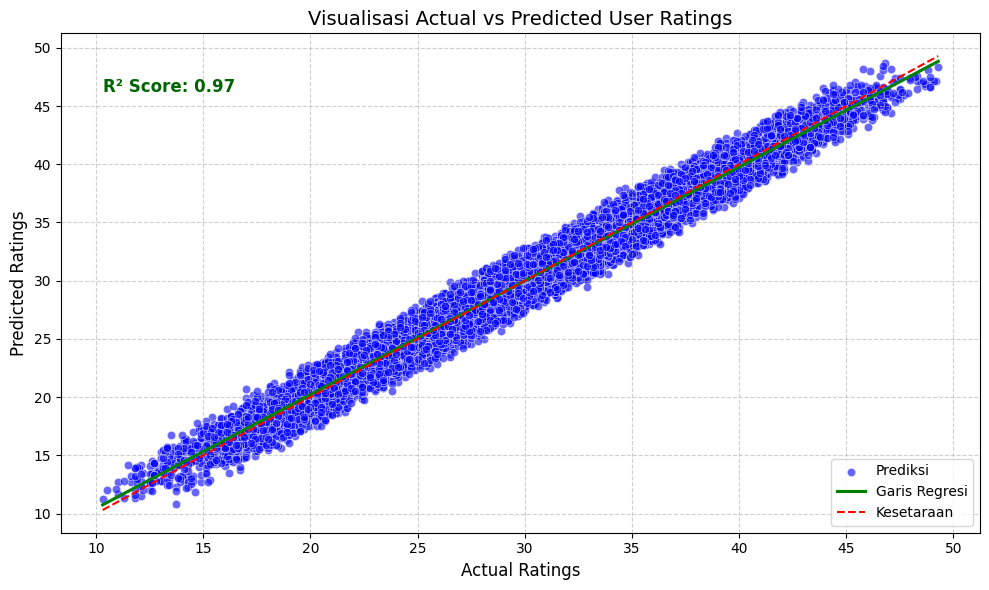

In [13]:
# modeling
# membagi embagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# melatih model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# visualisasi Prediksi dengan modifikasi
plt.figure(figsize=(10, 6))

# scatter plot antara actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Prediksi')

# garis regresi linier
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Garis Regresi')

# garis kesetaraan (Actual = Predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Kesetaraan')

# informasi R^2 Score
plt.text(min(y_test), max(y_pred) * 0.95, f"R² Score: {r2:.2f}", fontsize=12, color='darkgreen', weight='bold')

plt.title('Visualisasi Actual vs Predicted User Ratings', fontsize=14)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Evaluasi**

In [15]:
# mencetak hasil evaluasi
print("\nEvaluasi Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"- R² Score: {r2:.2f}")

# analisis hasil
print("\nAnalisis Hasil Evaluasi:")
print(f"1. **Mean Squared Error (MSE)**: {mse:.2f}")
print("   - MSE menunjukkan rata-rata kuadrat error antara nilai aktual dan prediksi.")
print("   - Nilai kecil menunjukkan prediksi model mendekati nilai aktual.")

print(f"2. **Mean Absolute Error (MAE)**: {mae:.2f}")
print("   - MAE mengukur rata-rata error absolut antara nilai aktual dan prediksi.")
print("   - Nilai kecil menunjukkan model lebih akurat dalam memprediksi nilai target.")

print(f"3. **R² Score**: {r2:.2f}")
print("   - R² mengukur seberapa baik model menjelaskan variabilitas data target.")
print("   - Nilai mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan hubungan antara fitur dan target.")


Evaluasi Model:
- Mean Squared Error (MSE): 1.65
- Mean Absolute Error (MAE): 1.08
- R² Score: 0.97

Analisis Hasil Evaluasi:
1. **Mean Squared Error (MSE)**: 1.65
   - MSE menunjukkan rata-rata kuadrat error antara nilai aktual dan prediksi.
   - Nilai kecil menunjukkan prediksi model mendekati nilai aktual.
2. **Mean Absolute Error (MAE)**: 1.08
   - MAE mengukur rata-rata error absolut antara nilai aktual dan prediksi.
   - Nilai kecil menunjukkan model lebih akurat dalam memprediksi nilai target.
3. **R² Score**: 0.97
   - R² mengukur seberapa baik model menjelaskan variabilitas data target.
   - Nilai mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan hubungan antara fitur dan target.
